# 1 Diagramme de Gantt

Pour voir le diagramme de Gantt: fichier `diagramme_Gantt.py`

![Grantt](diagramme_grantt.png)

# 2 Modèle Conceptuel des Données (MCD)

### Vue du MCD

![MCD](MCD.png)

Nous avons séparé notre dataset en trois parties:
- Album qui contient les albums et leurs liens URL
- Son qui contient les sons, les textes et leurs nombres de vues
- Date qui contient les dates de sorties des sons

### Schéma du MCD

![schéma MCD](schéma_mocodo.png)

On peut voir que d'apès le schéma, nous pouvons rassemblé les tables de son et date dans une même table.

Cela nous fera donc deux tables:
- Son
- Album

# 3 Explications de la mise en place du Dataset dans la BDD

La Bdd a été faite main directement sur phpMyAdmin.

Nous avons fait deux table:
- Songs:
    - id_song
    - Song_Name
    - Lyrics
    - Views
    - Release_date
- Albums:
    - Album_Name
    - Album_URL


Mise en place des données dans la BDD:
- Séparation du Dataset en deux DataFrame contenant:
    - Song_Name, Lyrics, Views et Release_date
    - Album_Name et Album_URL
- Chargement des deux DataFrame dans la bdd en liant les id_album des deux tables du bdd ensemble


Le plus compliqué est la liaison des deux tables car il faut réussir à lier les chansons au bon album en allant comparer leur nom entre la bdd et notre dataset

# 4 Affichage de la procédure stockée et de la vue

## A Vue

Cette vue permet d'afficher toutes les chansons et leur vue suivant leur date de parution

``` python
CREATE VIEW Chronologie AS SELECT Songs_Name, views FROM songs ORDER BY views DESC;
```

## B Procédures Stockées

Procédure 1:

Permet de trouver l'album de la chanson demandée

``` python
DELIMITER //;
Create procedure localisation_song
    -> (In con VARCHAR(100))
    -> BEGIN
    -> SELECT Album_name
    -> FROM album
    -> NATURAL JOIN songs
    -> WHERE Songs_name = con;
    -> END //;

DELIMITER ;
```

```python
CALL localisation_song('Rap God');
```

Procédure 2:

Permet de trouver les chansons de l'album demandé

```python
DELIMITER //;
CREATE procedure local_album
    -> (In con VARCHAR(100))
    -> BEGIN
    -> SELECT Songs_name
    -> FROM songs
    -> NATURAL JOIN album
    -> WHERE Album_name = con;
    -> END //;
    
DELIMITER ;
```

```python
CALL local_album("The Marshall Mathers LP2");
```

# 5 Analyse et visualisation du dataset

In [41]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


# Library for working with Text Data
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

punctuation = set(punctuation)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## A Visualisation et Préparation du Dataset

In [2]:
data = pd.read_csv("Eminem_Lyrics.csv", sep='\t', comment='#', encoding = "ISO-8859-1")
data.head()

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date,Unnamed: 6
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24.3K,"December 18, 2020",NaN
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180.6K,"December 18, 2020",NaN
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285.6K,"December 18, 2020",NaN
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210.9K,"December 18, 2020",NaN
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193.3K,"December 18, 2020",NaN


La colonne `Unnamed: 6` n'est pas bonne donc on l'a supprime

In [3]:
del data["Unnamed: 6"]

Visualisation du dataset après suppression

In [4]:
data.head()

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24.3K,"December 18, 2020"
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180.6K,"December 18, 2020"
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285.6K,"December 18, 2020"
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210.9K,"December 18, 2020"
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193.3K,"December 18, 2020"


On regarde le type des colonnes du Dataset et si il y a des valeurs nulles donc qui seront à supprimer

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Album_Name    348 non-null    object
 1   Song_Name     348 non-null    object
 2   Lyrics        348 non-null    object
 3   Album_URL     348 non-null    object
 4   Views         330 non-null    object
 5   Release_date  340 non-null    object
dtypes: object(6)
memory usage: 16.4+ KB


## B Suppression des valeurs nulles

In [6]:
data[data['Release_date'].isna()]

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date
132,Straight from the Lab Part 2,My Syllables,[Intro: Eminem]\nIt is not about lyrics anymor...,https://genius.com/albums/Eminem/Straight-from...,212.2K,NaN
310,Unreleased Songs,My Syllables,[Intro: Eminem]\nIt is not about lyrics anymor...,https://genius.com/albums/Eminem/Unreleased-songs,212.2K,NaN
327,Unreleased Songs,If I Told You,[Verse 1: Joyner Lucas]\nUh\nWhat if I told yo...,https://genius.com/albums/Eminem/Unreleased-songs,120.3K,NaN
335,Unreleased Songs,Benzino II (Skit),"[Eminem]\nYo, guys! Do you know what is this:\...",https://genius.com/albums/Eminem/Unreleased-songs,NaN,NaN
341,Unreleased Songs,Topless (Remix),"[Intro: T.I.]\nYeah, yeah, no roof\nLive life ...",https://genius.com/albums/Eminem/Unreleased-songs,6.6K,NaN
343,Unreleased Songs,Listen To Your Heart,[Chorus: Roxette]\nI know there's something in...,https://genius.com/albums/Eminem/Unreleased-songs,65.5K,NaN
344,Unreleased Songs,I Get Money (Remix),"[Intro]\nYeah, yeah, I get it\nI run this rap ...",https://genius.com/albums/Eminem/Unreleased-songs,28.5K,NaN
347,Unreleased Songs,Everything I Do,"[Intro]\nCDs ain't selling no more anyways, ma...",https://genius.com/albums/Eminem/Unreleased-songs,NaN,NaN


In [7]:
data = data.dropna(axis = "rows")

On vérifie que les valeurs nulles ne sont plus là

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 342
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Album_Name    324 non-null    object
 1   Song_Name     324 non-null    object
 2   Lyrics        324 non-null    object
 3   Album_URL     324 non-null    object
 4   Views         324 non-null    object
 5   Release_date  324 non-null    object
dtypes: object(6)
memory usage: 17.7+ KB


On supprime les valeur qui ont un problème au niveau de leur colonne 

In [9]:
data[data["Views"] == "November 12, 2004"]

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date
222,Encore,Final Thought (Skit),*People chanting Eminem*\n*Eminem tears up a p...,https://genius.com/albums/Eminem/Encore,"November 12, 2004","November 12, 2004"


In [10]:
wrong_index = [222]

data = data.drop(wrong_index, axis = 0)

In [11]:
data[data["Release_date"] == " "]

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date
121,Straight from the Lab Part 2,Topless,[Verse 1: Eminem as Dr. Dre]\nMy motto is live...,https://genius.com/albums/Eminem/Straight-from...,32K,


In [12]:
wrong_index = [121]

data = data.drop(wrong_index, axis = 0)

## C Changement des dates et des Vues

### _Passage des views de Objet à Numérique_

On transfome notre colonne views qui est un objet avec des K et M pour mille et million en valeur numérique

In [13]:
def to_number(string):
  string = list(string)
  letter_ban = ["K", "M", "\n"]
  letter_K = [True for element in string if element == "K"]
  letter_M = [True for element in string if element == "M"]
  string = [element for element in string if element not in letter_ban]

  number = float("".join(string))

  if True in letter_K:
    number *= 1000
  elif True in letter_M:
    number *= 1000000

  return round(number)

# exemple
print(to_number('1.9M\n'))

1900000


Comme on peut le voir si dessus notre 1,9M est transformé en 1 900 000.

Ci-dessous, on transforme la colonne views en valeur numérique

In [14]:
data["Views"] = data["Views"].apply(lambda num: to_number(num))

On vérifie que toute les lignes ont bien changées

In [15]:
data.head()

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24300,"December 18, 2020"
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180600,"December 18, 2020"
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285600,"December 18, 2020"
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210900,"December 18, 2020"
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193300,"December 18, 2020"


### _Passage d'une date Jour/Mois/Année à une date avec que l'année_

On transforme notre colonne Release_date pour n'avoir plus que l'année 

In [16]:
def to_year(date):
  string = list(date)

  if len(string) == 4:
    return int(date)
  elif len(string) == 6:
    date = 1999
  else:
    string = "".join(string)
    date = int(string[-4:])
  
  return date

# exemple
print(to_year('July 13, 2006'))

2006


Comme on peut le voir si dessus notre July 13, 2006 est transformé en 2006.

Ci-dessous, on passe notre colonne Release_date de object à date

In [17]:
data["Release_date"] = data["Release_date"].apply(lambda date: to_year(date))

On vérifie que toute les lignes ont bien changées

In [18]:
data.head()

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24300,2020
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180600,2020
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285600,2020
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210900,2020
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193300,2020


## D Affichage des chansons les plus populaires

In [19]:
popular_songs = data.sort_values(by = "Views", ascending = False)

Text(0.5, 1.0, "Les 5 chansons les plus populaires d'Eminem")

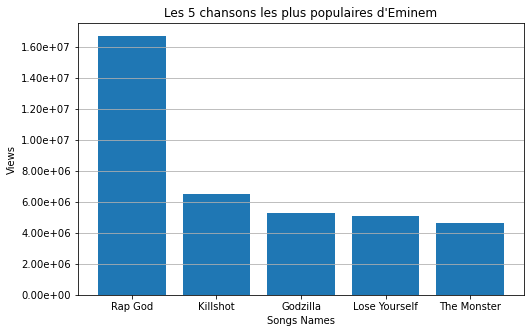

In [20]:
songs_titles = popular_songs["Song_Name"].unique()[:5]
songs_views = popular_songs["Views"].unique()[:5]

# matplotlib settings
fig = plt.figure(figsize = (8, 5))
ax = fig.add_subplot(111)

ax.grid(axis='y')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.bar(songs_titles, songs_views)
plt.xlabel("Songs Names")
plt.ylabel("Views")
plt.title("Les 5 chansons les plus populaires d'Eminem")

## E Affichage des albums les plus écoutées

Text(2018.5, 29372800, 'Kamikaze')

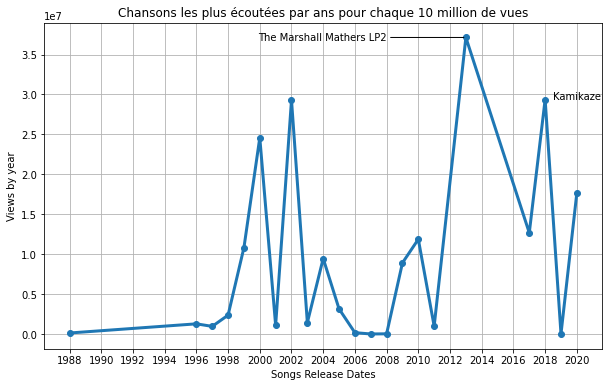

In [21]:
songs_titles = popular_songs["Song_Name"].unique()[:5]
songs_date = np.sort(data["Release_date"].unique())[::-1]

date_views = []
for year in songs_date:
  date_views.append(data["Views"][(data["Release_date"] == year)].sum())

# matplotlib settings
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.grid(True)

#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.xaxis.set_major_locator(mtick.MultipleLocator(2))

ax.plot(songs_date, date_views, marker = "o", linewidth = 3)
plt.xlabel("Songs Release Dates")
plt.ylabel("Views by year")
plt.title("Chansons les plus écoutées par ans pour chaque 10 million de vues")
style = dict(facecolor = "black", arrowstyle = "-")
ax.annotate(xy = (2013, date_views[4]), xytext = (2008, date_views[4]), s = "The Marshall Mathers LP2", 
            ha = "right", va = "center", arrowprops = style)
ax.text(x = 2018.5, y = date_views[2], s = "Kamikaze")

## F Affichage du nombres d'écoute de tout les albums

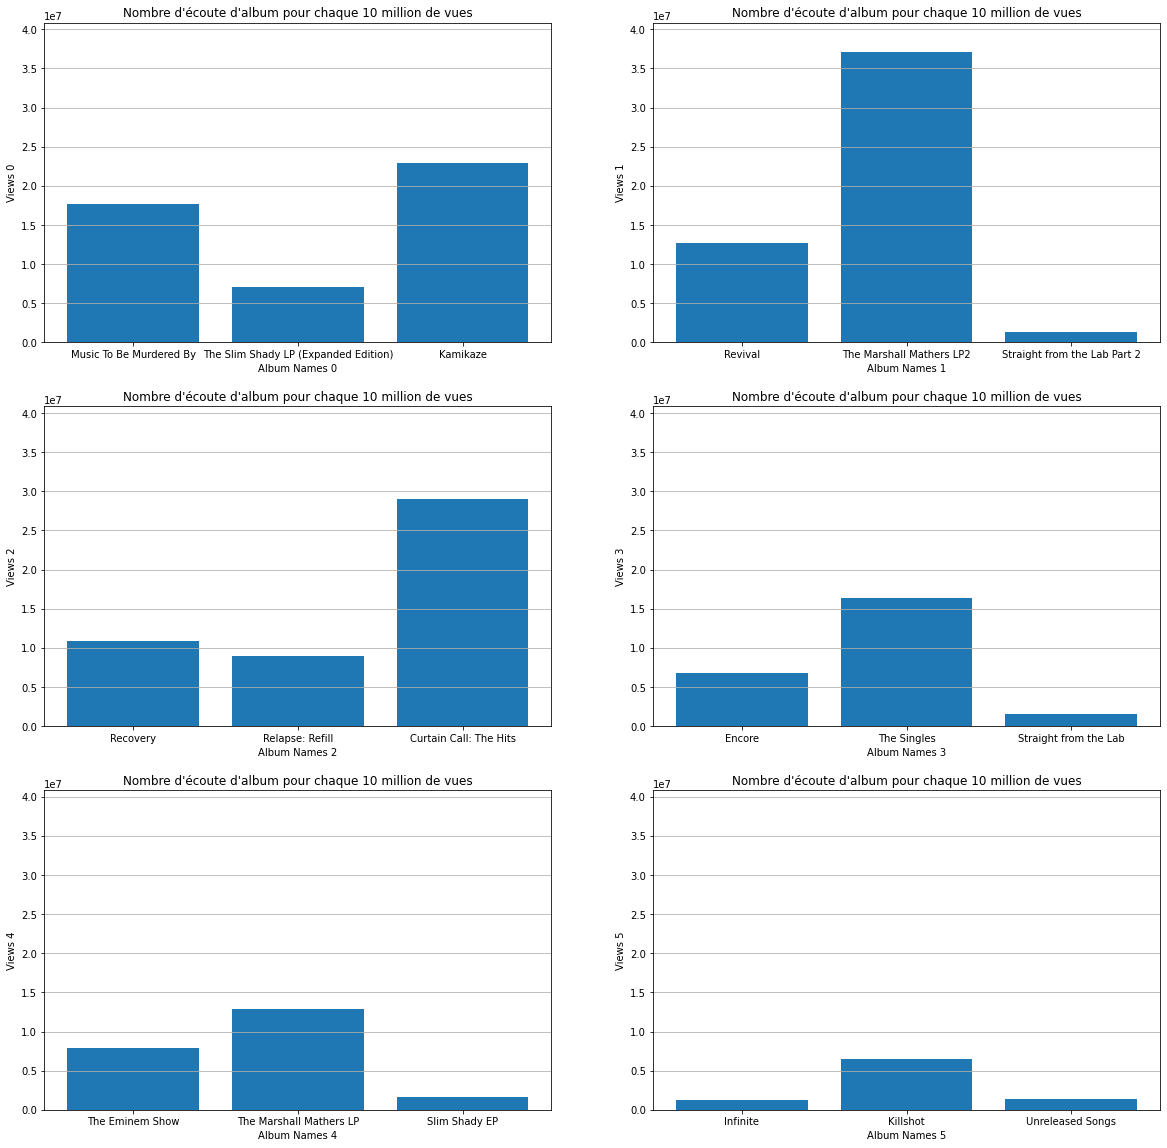

In [22]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [alist[i*length // wanted_parts: (i+1)*length // wanted_parts] for i in range(wanted_parts)]

album_titles = data["Album_Name"].unique()
album_views = []

for album in album_titles:
  album_views.append(data["Views"][data["Album_Name"] == album].sum())

album_titles = split_list(album_titles, 6)
album_titles[0][0] = "Music To Be Murdered By"
album_views = split_list(album_views, 6)

# Obtention du max de vues de tout les albums
liste = []
for i in album_views:
    liste.append(max(i))
maxi_vue = max(liste)

# matplotlib settings
plt.figure(figsize=(20,20))

for i in range(6):
  plt.subplot(3, 2,(i%12)+1)
  plt.title("Nombre d'écoute d'album pour chaque 10 million de vues")
  plt.ylabel(f"Views {i}")
  plt.xlabel(f"Album Names {i}")
  plt.ylim(0, maxi_vue + maxi_vue/10)
  plt.grid(axis='y')
  plt.bar(album_titles[i], album_views[i])

## G Affichage d'un nuage de mots

Notre but est d'afficher un nuage de mots à partir de la colonne Lyrics.

Nous allons récupérer les mots les plus utilisés dans la colonne Lyrics pour les afficher dans notre nuage

In [23]:
lemmatizer = WordNetLemmatizer()
word_tokenizer = word_tokenize

On créé une fonction qui va transformer une phrase en une liste de mot

In [24]:
def intro_words_filter(text):
  
  prepared_text = re.sub(r'\[([^]]*)]', '', text)
  prepared_text = prepared_text.replace("  ", " ")

  return prepared_text

# example
intro_words_filter("[Verse 1] Before  I check  the mic (Check, check, one, two) [Verse 2]")

' Before I check the mic (Check, check, one, two) '

On créé une nouvelle colonne dans notre Dataset qui va regrouper la liste des mots utilisés dans les Lyrics pour chaque ligne

In [25]:
data["Prepared_Lyrics"] = data["Lyrics"].apply(lambda text: intro_words_filter(text))

data

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date,Prepared_Lyrics
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24300,2020,"\nThus far, this album has provided musical ac..."
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180600,2020,"\nBlack magic, night walker (Yeah)\nShe haunts..."
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285600,2020,"\nBefore I check the mic (Check, check, one, t..."
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210900,2020,"\nYeah, I'm sorry (Huh?)\nWhat did you say?\nO..."
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193300,2020,"\nI don't smile, I don't frown, get too up or ..."
...,...,...,...,...,...,...,...
331,Unreleased Songs,Give Me the Ball,[Verse 1: Eminem]\nMy name is Chauncey Billups...,https://genius.com/albums/Eminem/Unreleased-songs,15400,2011,"\nMy name is Chauncey Billups, I'm kind of lik..."
332,Unreleased Songs,Despicable,"[Intro]\nUgh, ha (Da-na na-na-na)\nNah, fuck a...",https://genius.com/albums/Eminem/Unreleased-songs,209600,2010,"\nUgh, ha (Da-na na-na-na)\nNah, fuck an intro..."
334,Unreleased Songs,Foolish Pride,"[Intro: Eminem & Manix]\nYo man, yo Marsh, man...",https://genius.com/albums/Eminem/Unreleased-songs,143400,1988,"\nYo man, yo Marsh, man\nYo, you've been kicki..."
340,Unreleased Songs,50 Ways,[Verse 1: Eminem]\nYou probably gonna think th...,https://genius.com/albums/Eminem/Unreleased-songs,27700,2011,\nYou probably gonna think that I'm talking\nA...


On supprime les ponctuation et les espaces

In [26]:
def filtring_punct(text):
  elements = [element if element not in punctuation else '' for element in text]
  return ''.join(elements)

stop_words_to_filter = stopwords.words('english')
def filter_stop_words(text, stop_words_to_filter):
  filtered_text = [elem for elem in text if elem not in stop_words_to_filter]
  return filtered_text

On transforme notre texte en liste de mots

In [27]:
data["Prepared_Lyrics"] = data["Prepared_Lyrics"].apply(lambda text: filtring_punct(text))
data["Prepared_Lyrics"] = data["Prepared_Lyrics"].apply(word_tokenizer)
data["Prepared_Lyrics"] = data["Prepared_Lyrics"].apply(lambda text: filter_stop_words(text, stop_words_to_filter))

data.head()

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date,Prepared_Lyrics
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24300,2020,"[Thus, far, album, provided, musical, accompan..."
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180600,2020,"[Black, magic, night, walker, Yeah, She, haunt..."
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285600,2020,"[Before, I, check, mic, Check, check, one, two..."
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210900,2020,"[Yeah, Im, sorry, Huh, What, say, Oh, I, cant,..."
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193300,2020,"[I, dont, smile, I, dont, frown, get, get, Nah..."


In [28]:
def to_string(text):
  words = [element for element in text]

  return ' '.join(words)

# example
to_string(["A", "B", "C"])

'A B C'

In [29]:
def lemmatize_text(text, lemmatizer):
  return [lemmatizer.lemmatize(element) for element in text]

In [30]:
data["Prepared_Lyrics"] = data["Prepared_Lyrics"].apply(lambda text: lemmatize_text(text, lemmatizer))

data

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date,Prepared_Lyrics
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24300,2020,"[Thus, far, album, provided, musical, accompan..."
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180600,2020,"[Black, magic, night, walker, Yeah, She, haunt..."
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285600,2020,"[Before, I, check, mic, Check, check, one, two..."
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210900,2020,"[Yeah, Im, sorry, Huh, What, say, Oh, I, cant,..."
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193300,2020,"[I, dont, smile, I, dont, frown, get, get, Nah..."
...,...,...,...,...,...,...,...
331,Unreleased Songs,Give Me the Ball,[Verse 1: Eminem]\nMy name is Chauncey Billups...,https://genius.com/albums/Eminem/Unreleased-songs,15400,2011,"[My, name, Chauncey, Billups, Im, kind, like, ..."
332,Unreleased Songs,Despicable,"[Intro]\nUgh, ha (Da-na na-na-na)\nNah, fuck a...",https://genius.com/albums/Eminem/Unreleased-songs,209600,2010,"[Ugh, ha, Dana, nanana, Nah, fuck, intro, man,..."
334,Unreleased Songs,Foolish Pride,"[Intro: Eminem & Manix]\nYo man, yo Marsh, man...",https://genius.com/albums/Eminem/Unreleased-songs,143400,1988,"[Yo, man, yo, Marsh, man, Yo, youve, kickin, s..."
340,Unreleased Songs,50 Ways,[Verse 1: Eminem]\nYou probably gonna think th...,https://genius.com/albums/Eminem/Unreleased-songs,27700,2011,"[You, probably, gon, na, think, Im, talking, A..."


Concatene les mots de la liste sur une nouvelle colonne

In [31]:
data_modelling = data
data_modelling["Lyrics_Modelling"] = data_modelling["Prepared_Lyrics"].apply(lambda text: to_string(text))

# data_modelling

In [32]:
data["Prepared_Lyrics"] = data["Prepared_Lyrics"].apply(lambda text: filter_stop_words(text, stop_words_to_filter))

In [33]:
data

,Album_Name,Song_Name,Lyrics,Album_URL,Views,Release_date,Prepared_Lyrics,Lyrics_Modelling
0,Music To Be Murdered By: Side B,Alfred (Intro),"[Intro: Alfred Hitchcock]\nThus far, this albu...",https://genius.com/albums/Eminem/Music-to-be-m...,24300,2020,"[Thus, far, album, provided, musical, accompan...",Thus far album provided musical accompaniment ...
1,Music To Be Murdered By: Side B,Black Magic,"[Chorus: Skylar Grey & Eminem]\nBlack magic, n...",https://genius.com/albums/Eminem/Music-to-be-m...,180600,2020,"[Black, magic, night, walker, Yeah, She, haunt...",Black magic night walker Yeah She haunt like F...
2,Music To Be Murdered By: Side B,Alfreds Theme,"[Verse 1]\nBefore I check the mic (Check, chec...",https://genius.com/albums/Eminem/Music-to-be-m...,285600,2020,"[Before, I, check, mic, Check, check, one, two...",Before I check mic Check check one two I give ...
3,Music To Be Murdered By: Side B,Tone Deaf,"[Intro]\nYeah, I'm sorry (Huh?)\nWhat did you ...",https://genius.com/albums/Eminem/Music-to-be-m...,210900,2020,"[Yeah, Im, sorry, Huh, What, say, Oh, I, cant,...",Yeah Im sorry Huh What say Oh I cant hear I ea...
4,Music To Be Murdered By: Side B,Book of Rhymes,"[Intro]\nI don't smile, I don't frown, get too...",https://genius.com/albums/Eminem/Music-to-be-m...,193300,2020,"[I, dont, smile, I, dont, frown, get, get, Nah...",I dont smile I dont frown get get Nah I came w...
...,...,...,...,...,...,...,...,...
331,Unreleased Songs,Give Me the Ball,[Verse 1: Eminem]\nMy name is Chauncey Billups...,https://genius.com/albums/Eminem/Unreleased-songs,15400,2011,"[My, name, Chauncey, Billups, Im, kind, like, ...",My name Chauncey Billups Im kind like raunchy ...
332,Unreleased Songs,Despicable,"[Intro]\nUgh, ha (Da-na na-na-na)\nNah, fuck a...",https://genius.com/albums/Eminem/Unreleased-songs,209600,2010,"[Ugh, ha, Dana, nanana, Nah, fuck, intro, man,...",Ugh ha Dana nanana Nah fuck intro man let go Y...
334,Unreleased Songs,Foolish Pride,"[Intro: Eminem & Manix]\nYo man, yo Marsh, man...",https://genius.com/albums/Eminem/Unreleased-songs,143400,1988,"[Yo, man, yo, Marsh, man, Yo, youve, kickin, s...",Yo man yo Marsh man Yo youve kickin shit What ...
340,Unreleased Songs,50 Ways,[Verse 1: Eminem]\nYou probably gonna think th...,https://genius.com/albums/Eminem/Unreleased-songs,27700,2011,"[You, probably, gon, na, think, Im, talking, A...",You probably gon na think Im talking About you...


On compte les mots pour pouvoir déterminer ceux qui ont le plus grands nombre.

In [34]:
def word_count(text):
  main_dict = {}

  for sentence in text:  
        for word in word_tokenizer(sentence):
            if word not in main_dict:
                main_dict[word] = 0 
            main_dict[word] += 1
        
  return {k:v for k,v in sorted(main_dict.items(), key=lambda kv: kv[1], reverse=True)}

texts = data_modelling["Lyrics_Modelling"]
word_counts = word_count(texts)
# word_counts

On supprime les mots courants de la langue anglaise

Puis on récupère les mots qui réviennent au moins 5 fois

In [35]:
ban_words = ["Im", "I", "u", "Its", "wan", "The", "got", "But", "get", "And", "dont",
             "so", "If", "My", "Me", "So", "Me", "me", "em", "youre", "aint", "na",
             "You", "you", "gon", "cant", "We", "thats", "To", "This", "Ima", "Id",
             "Ive", "ya", "Youre", "That", "Ta", "It", "A", "\x91Cause", "In", "Then",
             "I\x92m", "yall", "Or", "Why", "it\x92s", "Ill"]

filtered_count = {k:v for k, v in word_counts.items() if k not in ban_words}
filtered_count = {k:v for k, v in filtered_count.items() if k.isalpha()}

min_frequency = 5

filtered_count = {k:v for k, v in filtered_count.items() if v > min_frequency}

# filtered_count

In [36]:


main_dict = filtered_count.keys()

count_vectorizer = CountVectorizer(vocabulary = main_dict)

count_vectorizer.fit(texts)

term_matrix = count_vectorizer.transform(texts)



In [37]:
terms = count_vectorizer.get_feature_names()
count_terms = term_matrix.toarray().sum(axis=0)

dictionary = dict(zip(terms, count_terms))
dictionary

dictionary = pd.Series(dictionary) 
dictionary = dictionary.sort_values(ascending=False) 



On créé notre nuage de point

In [38]:
from wordcloud import WordCloud

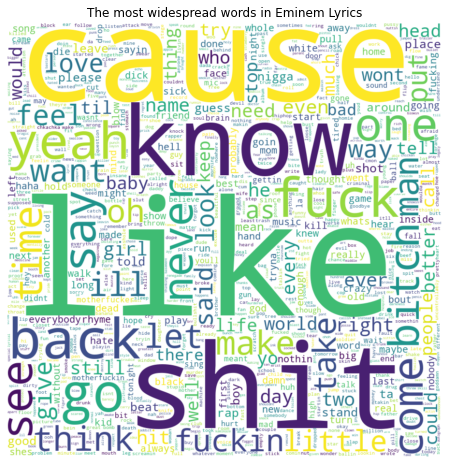

In [39]:
names = dictionary.index
values = dictionary.values

# creating word cloud graph
def plot_word_cloud(word_list):
    
    wordcloud = WordCloud(background_color="white", max_words=1000, width=900, height=900, collocations=False)
    wordcloud = wordcloud.generate_from_frequencies(word_list)
    plt.figure(figsize=(12, 8))
    plt.title("The most widespread words in Eminem Lyrics")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() 

    
plot_word_cloud(dictionary)